## EDA To Prediction(DieTanic)
- 필사 출처: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

- part1: Exploratory Data Analysis(EDA)
  - analysis of the features
  - finding any relations or trends considering multiple features
- part2: Feature Engineering and Data Cleaning
  - ***adding any few features***
  - removing redundant features
  - converting features into suitable form for modeling
- part3: Predictive Modeling 
  - running basic algorithms
  - cross validation
  - ensembling
  - ***important features extraction***

### Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Age, Cabin and Embarked have null values. I will try to fix them

- **How many Survived?**

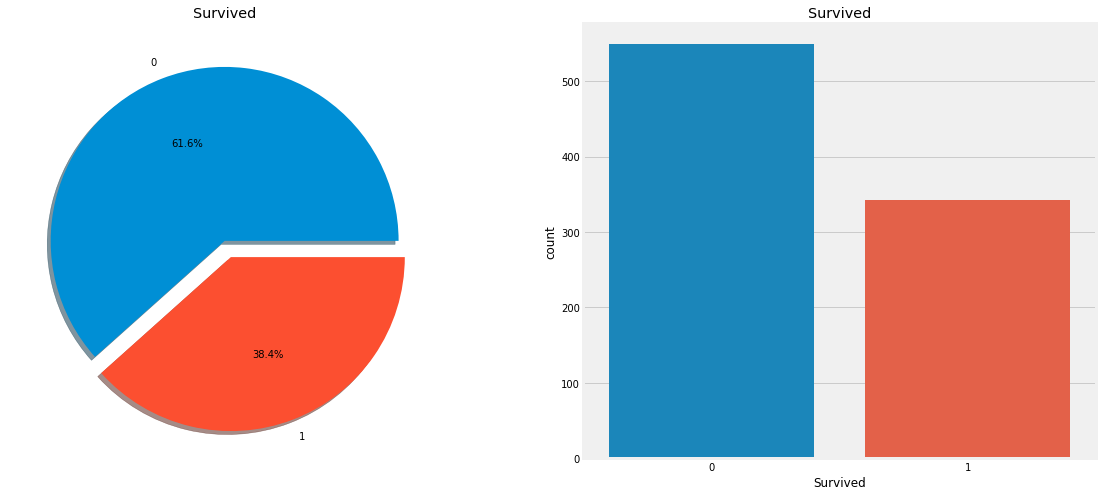

In [5]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- It is evident that not many passengers survived the accident
- Out of 891 passengers in training set, only around 350 survived i.e. Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't
- We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port of Embarcation, Age, etc.
- First let us Understand the different types of features.

#### Types of Feaures
- Categorical Features:
  - A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.
  - For example, gender is a categorical variable having two categories(male and female). Now we cannot sort or give any ordering to such variables. They are also know as Nominal Variables.
  - categorical features in the dataset: Sex, Embarked

- Ordinal Feautres:
  - an ordinal variable is similar to categorical values, but the difference between them is that we can have ralative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable
  - Ordinal features in the dataset: PClass

- Continuous Feature:
  - a feature is said to be continous if it can take values between any two points or between the minimum or maximum vlues in the features column.
  - Continous Features in the dataset: Age

#### Analysing The Features
- **Sex -> Categorical Feature**

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

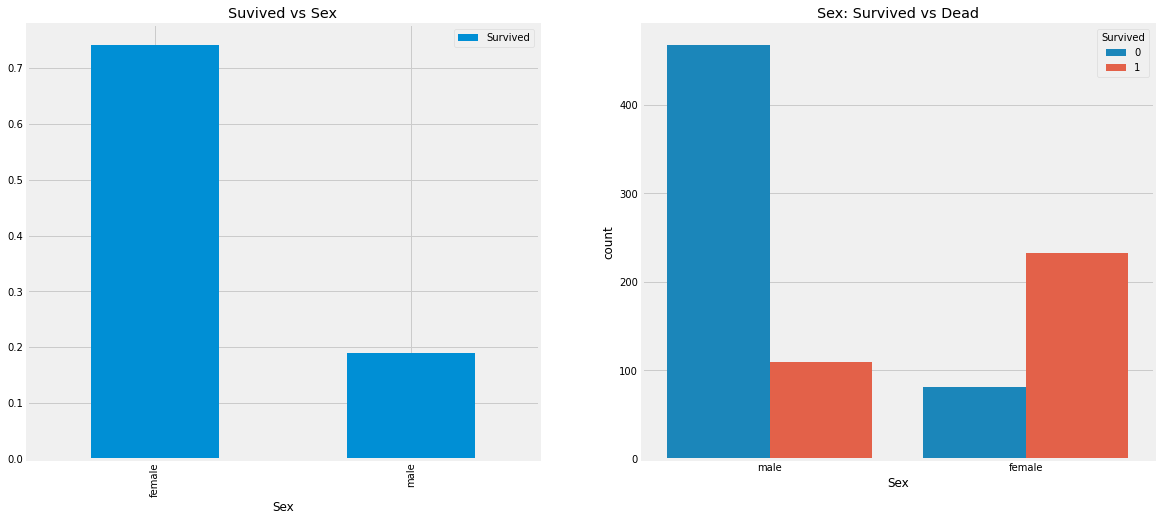

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Suvived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males survived. The survival rates for a women on the ship is around 75% while tha for men in around 18~19%.
- This looks to be a very important feature for modeling. But is it the best? Let's check other features.

- **PClass -> Ordinal Feature**

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


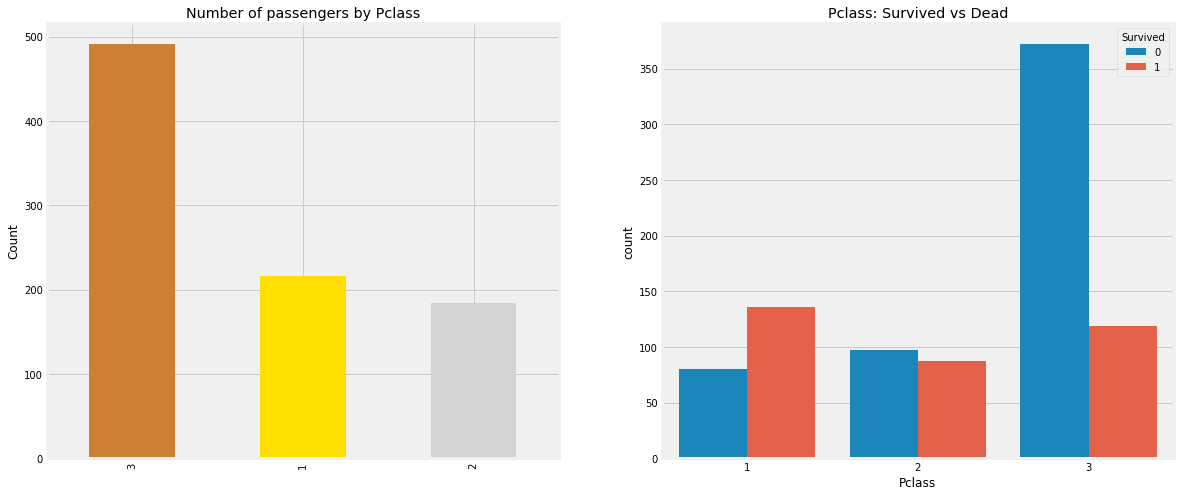

In [9]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- People say Money Can't buy everthing. But we can clearly see that passengers of Pclass 1 were given a very high priority while rescue. Even though the the number of passengers in Pclass 3 were lot higher, still the number of survival from them is very low, somewhere around 25%.
- For Pclass 1 %surrived is around 63% while for Pclass2 is around 48%. So money and status matters.
- Let's Dive in a little bit more and check for other interesitng observations. Let's check survival rate with **Sex and Pclass together**.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

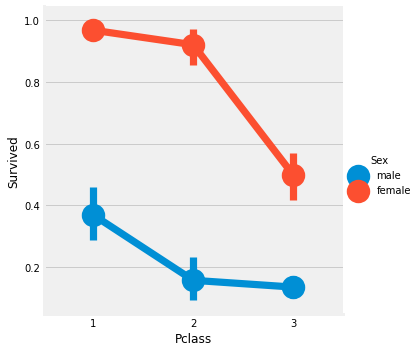

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

- we use factorplot in this case, because they make the seperation of categorical values easy.
- looking at the crosstab and the facotrplot, we can easily infer that surival for Women from Pclass 1 is about 95~96%, as only 3 out of 94 Women from Pclass 1 died.
- it is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.
- Looks like Pclass is also an important feature. Let's analyse other features.

- **Age -> Continuous Feature**

In [12]:
print('The oldest Passengers was of: ', data['Age'].max(),'Years')
print('The youngest Passengers was of: ', data['Age'].min(),'Years')
print('The average Age on the ship: ', data['Age'].mean(),'Years')

The oldest Passengers was of:  80.0 Years
The youngest Passengers was of:  0.42 Years
The average Age on the ship:  29.69911764705882 Years


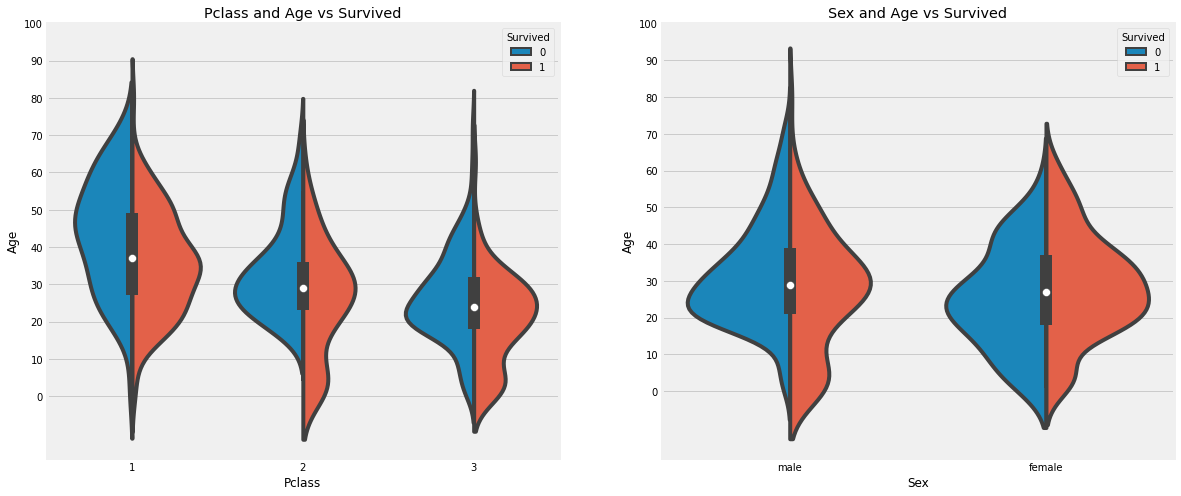

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass',"Age",hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

- the number of children increases with Pclass and the survival rate for passengers below Age 10(i.e. children) looks to be good irrespective of the Pclass
- ***Survival chances for passengers aged 20-50 from Pclass 1 is high and is even better for women.***
***- for males, the survival chances decreases with and increase in age.***

- As we had seen earlier, the Age feature has 177 null values. To replace these Nan values, we can assign them the mean age of the dataset.
- But the problem is, there were many people with many different ages. We just cannot assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie?
- we can check the Name feature! looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the repective groups.

**- What's in a name? -> Feature**

In [14]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # extract the salutations
                                                           # it looks for strings which lie between A-Z or a-z and followed by a .(dot)
                                                           # so we can successfully extract the initials from the name

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') #check the initails with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
# there are some misspelled initials like Mile Mme that stand for Miss. we have to replace them with Miss and same thig for other values
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [23]:
data.groupby('Initial')['Age'].mean() #check the average age by initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**- Filling NaN ages**    
***- master가 5세? -> 진정한 의미의 평균은 아니지 않나***

In [26]:
# assigning the Nan values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age'] = 46

In [28]:
data.Age.isnull().any() # so no null values left finally

False

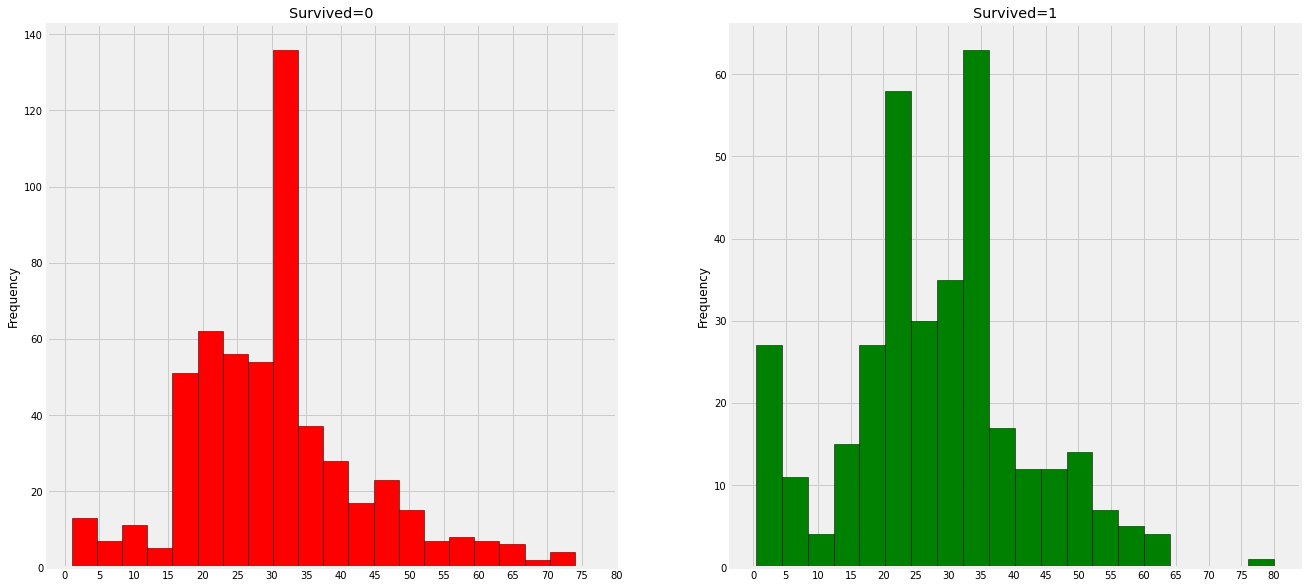

In [29]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- The toddlers(age<5) were saved in large numbers(The Womens and Child First Policy)
- The oldest Passengers was saved(80 years)
- ***Maximum number of deaths were in the age group of 30-40***

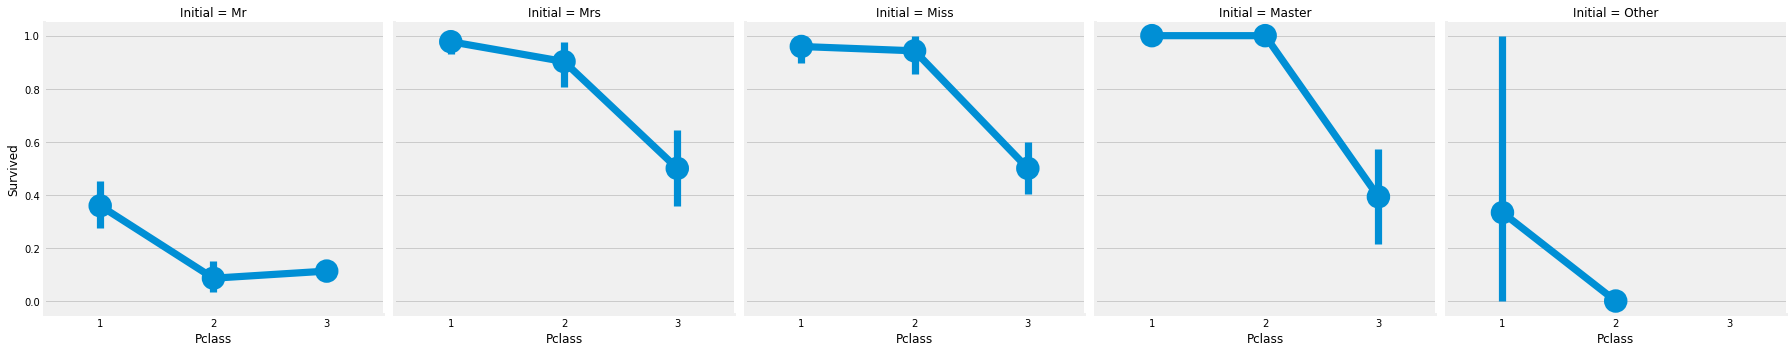

In [31]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

- The women and child first policy thus holds true irrespective of the class

**- Embarked -> Categorical value**

In [32]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

- Chances for Survival by Port of Embarkation

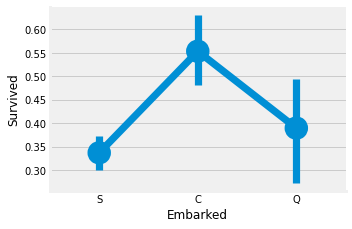

In [33]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- the chances for survival for port C is the highest around 0.55 while it is the lowest for S

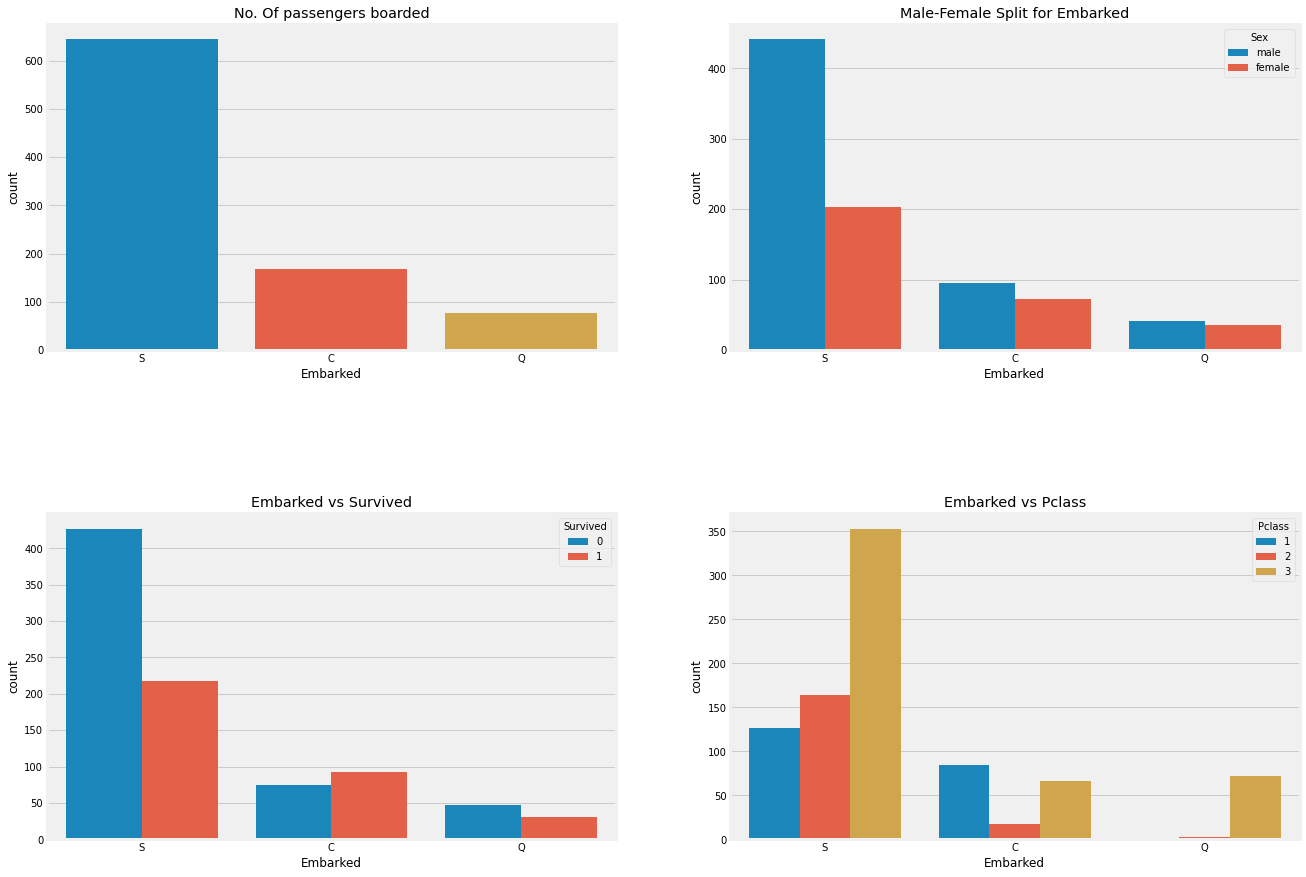

In [34]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of passengers boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- Maximum passengers boarded from S. Majority of them being from Pclass 3.
- The passengers from C look to be lucky as a good propotion of them survived. the reason for this maybe the rescue of all the Pclass1 and Pclass2 passengers.
- The embarked S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass 3 around 81% didn't survive.
- Port Q had almost 95% of the passengers were from Pclass3.

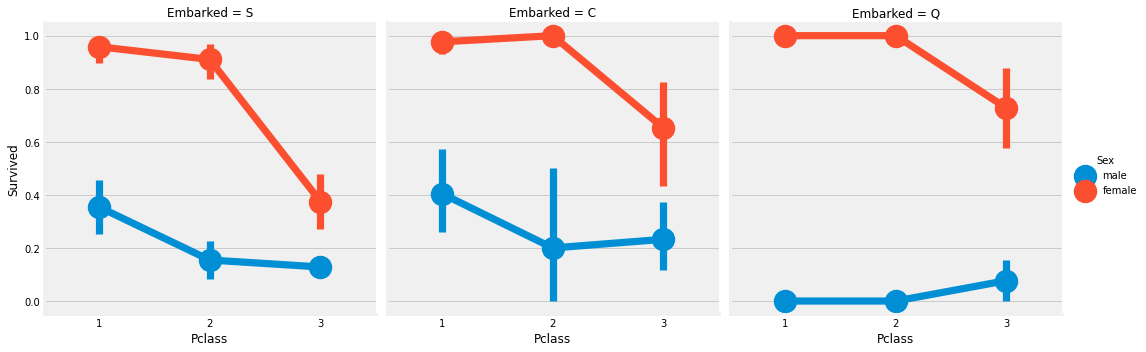

In [35]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

- The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.
- Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low(money matters)
- Port Q looks to be the unluckiest for Men, as almost all were from Pclass 3.

**- Filling Embarked NaN**

In [36]:
#As we saw that maximum passengers boarded from port S, we replaced NaN with S.
data['Embarked'].fillna('S',inplace=True)

In [37]:
data.Embarked.isnull().any() #finally no NaN values

False

**- SibSip -> Discrete Feature**
- this feature represents whether a person is alone or with his family members.
- siblings = brother,sister,stepbrother,stepsister
- spouse = husband, wife

In [39]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


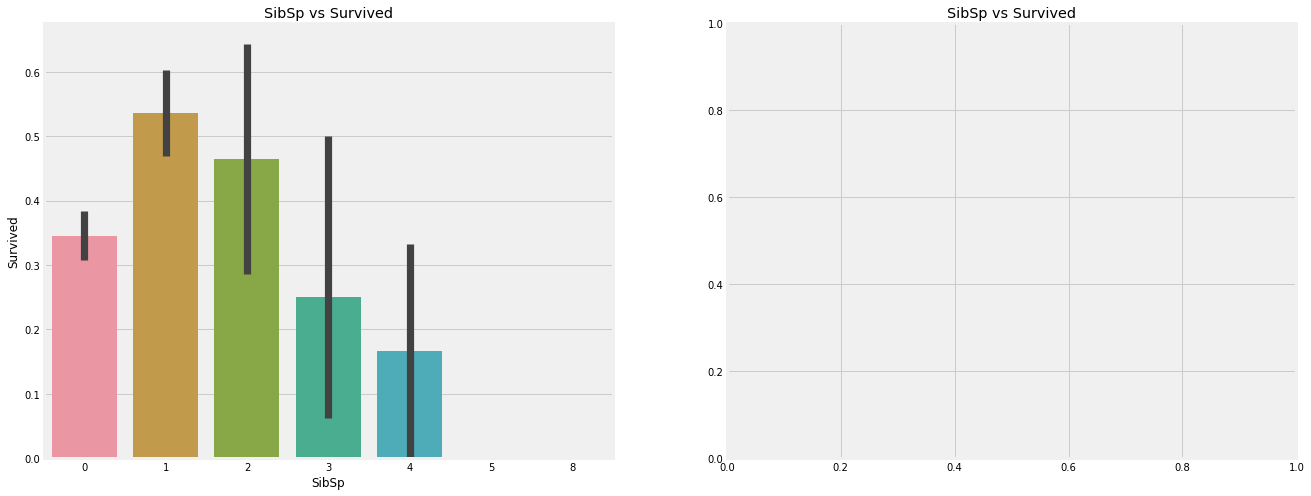

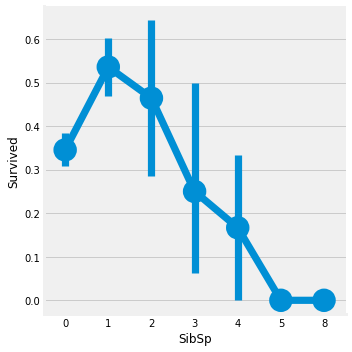

In [41]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2)
plt.show()

In [43]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- The barplot and factorplot show that if a passenger is alone onboard with no siblngs, he or she has 34.5% survival rate. The graph roughly decreases if the number of sibling increase. This make sense. That is, if i have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass?
- The reason is Pclass. The crosstab show that person with sibSip >3 were all in Pclass3. it is imminent that all the large families in pclass3(>3) died.

- **Parch**